Epoch 0 Loss: 0.4947953522205353
Epoch 10 Loss: 0.22303082048892975
Epoch 20 Loss: 0.08376108855009079
Epoch 30 Loss: 0.06935905665159225
Epoch 40 Loss: 0.04468127340078354
Epoch 50 Loss: 0.020670169964432716
Epoch 60 Loss: 0.0058937412686645985
Epoch 70 Loss: 0.003288271836936474
Epoch 80 Loss: 0.0024482975713908672
Epoch 90 Loss: 0.0023710613604635


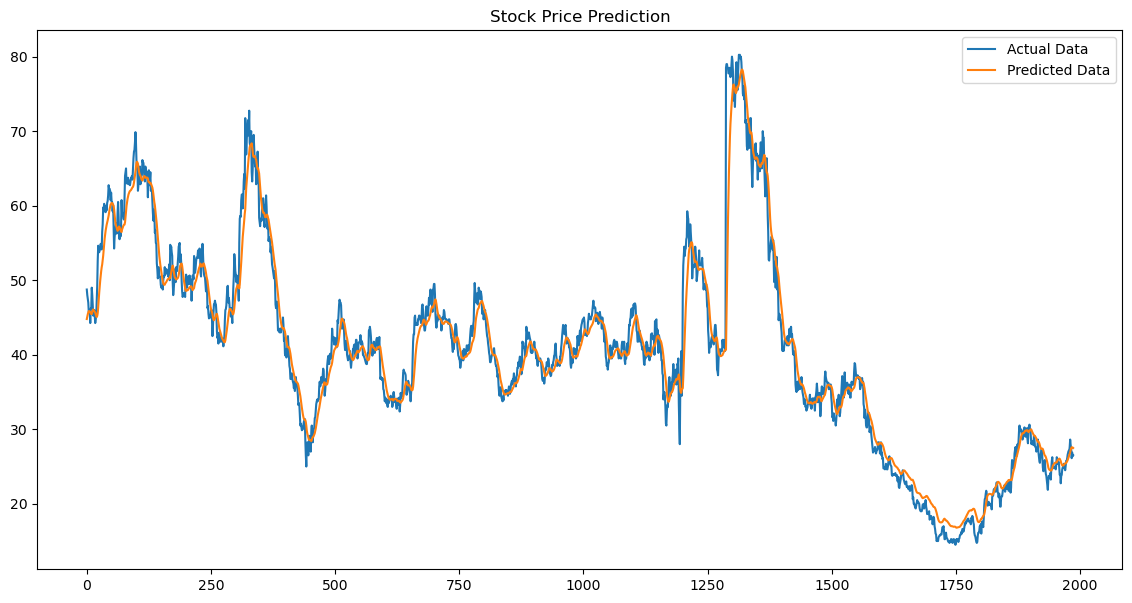

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Load the dataset
data = pd.read_csv('assignment.csv')

# Data preprocessing
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create sequences for the LSTM model
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 60
x, y = create_sequences(scaled_close, sequence_length)

# Split the data into training and testing sets
train_size = int(len(y) * 0.67)
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

# Convert to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the LSTM Model
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, num_layers=1):
        super(LSTM, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, 1)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_layer_size).to(x.device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_layer_size).to(x.device)
        output, (hidden, _) = self.lstm(x, (h_0, c_0))
        output = self.linear(output[:, -1, :])
        return output

# Initialize the model, define the loss function and the optimizer
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss: {loss.item()}')

# Make predictions
model.eval()
predicted = model(x_test)
predicted = scaler.inverse_transform(predicted.detach().numpy())
actual = scaler.inverse_transform(y_test.detach().numpy())

# Plot the results
plt.figure(figsize=(14,7))
plt.plot(actual, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()


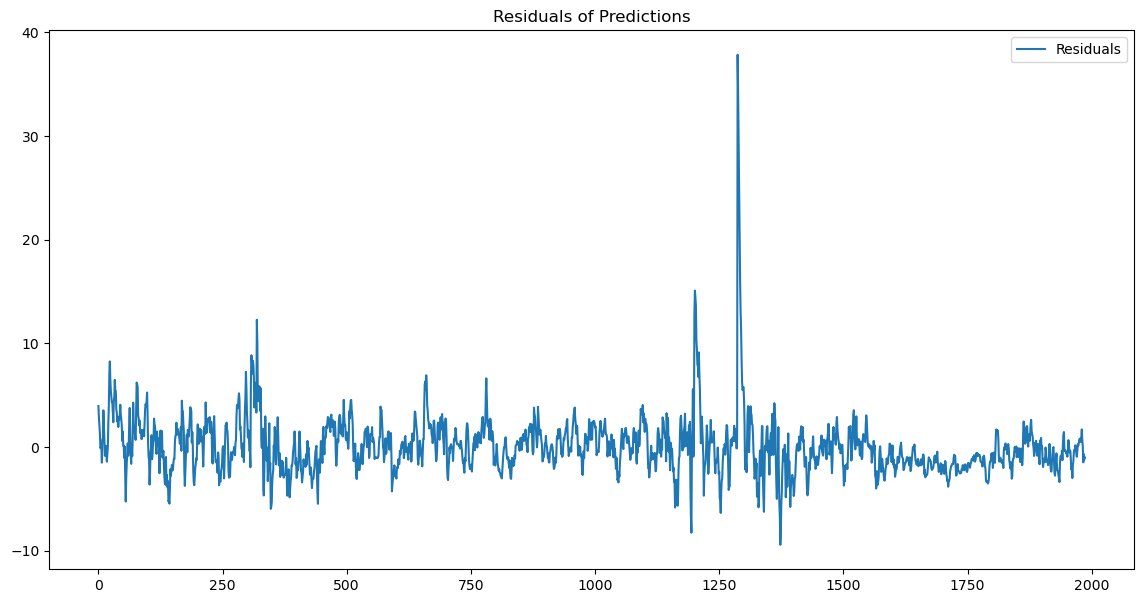

Mean Squared Error: 7.888900279998779


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset




residuals = actual - predicted


plt.figure(figsize=(14,7))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Predictions')
plt.legend()
plt.show()


mse = mean_squared_error(actual, predicted)
print(f'Mean Squared Error: {mse}')

Epoch 0 Loss: 0.6368177533149719
Epoch 10 Loss: 0.14849014580249786
Epoch 20 Loss: 0.03843216225504875
Epoch 30 Loss: 0.009590042755007744
Epoch 40 Loss: 0.004196676891297102
Epoch 50 Loss: 0.0024585274513810873
Epoch 60 Loss: 0.001861021970398724
Epoch 70 Loss: 0.001596648246049881
Epoch 80 Loss: 0.0014393387828022242
Epoch 90 Loss: 0.0013718196423724294


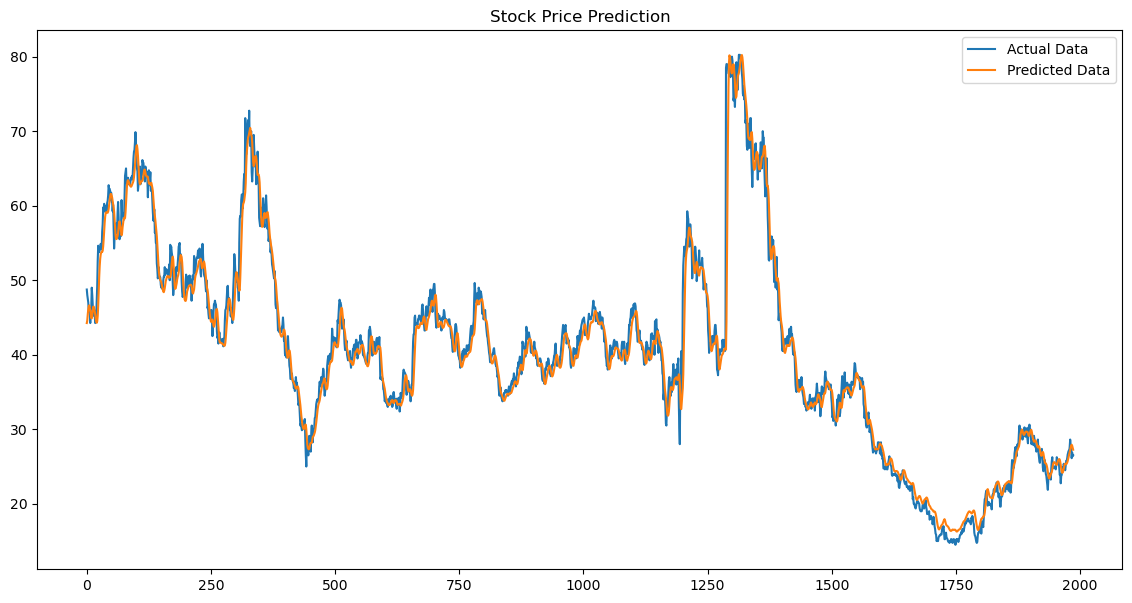

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Load the dataset
data = pd.read_csv('assignment.csv')

# Data preprocessing
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create sequences for the RNN model
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 60
x, y = create_sequences(scaled_close, sequence_length)

# Split the data into training and testing sets
train_size = int(len(y) * 0.67)
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

# Convert to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the RNN Model
class RNN(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, num_layers=1):
        super(RNN, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_layer_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, 1)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_layer_size).to(x.device)
        output, hidden = self.rnn(x, h_0)
        output = self.linear(output[:, -1, :])
        return output

# Initialize the model, define the loss function and the optimizer
model = RNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss: {loss.item()}')

# Make predictions
model.eval()
predicted = model(x_test)
predicted = scaler.inverse_transform(predicted.detach().numpy())
actual = scaler.inverse_transform(y_test.detach().numpy())

# Plot the results
plt.figure(figsize=(14,7))
plt.plot(actual, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()


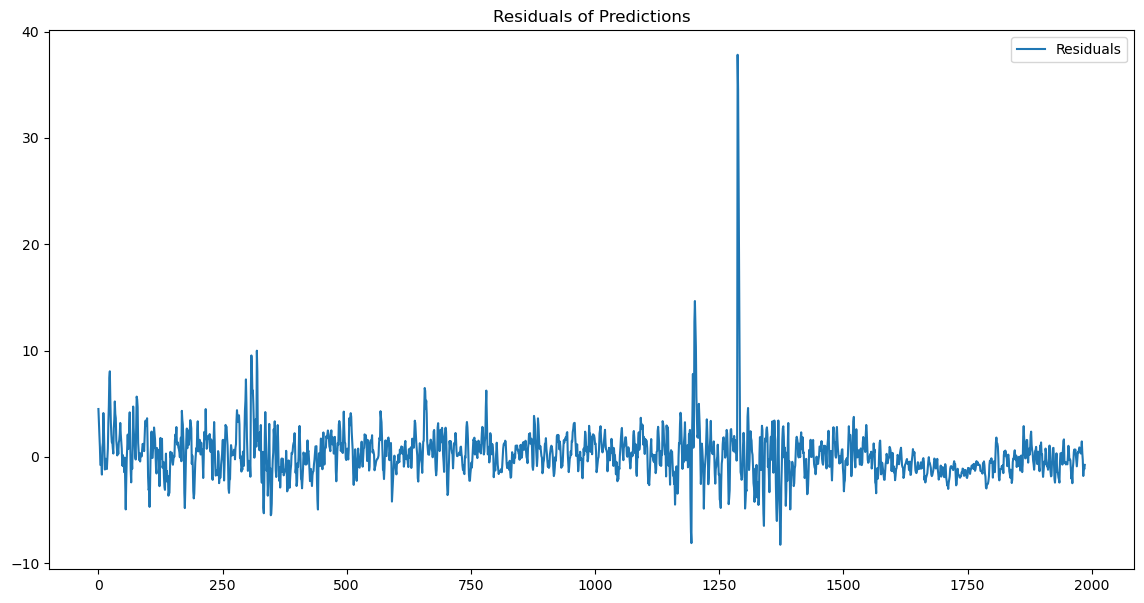

Mean Squared Error: 5.564835071563721


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset



residuals = actual - predicted


plt.figure(figsize=(14,7))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Predictions')
plt.legend()
plt.show()


mse = mean_squared_error(actual, predicted)
print(f'Mean Squared Error: {mse}')


Epoch 0 Loss: 0.6149479150772095
Epoch 10 Loss: 0.16675761342048645
Epoch 20 Loss: 0.07261162996292114
Epoch 30 Loss: 0.050237804651260376
Epoch 40 Loss: 0.02660110592842102
Epoch 50 Loss: 0.010914681479334831
Epoch 60 Loss: 0.0025471604894846678
Epoch 70 Loss: 0.002579796826466918
Epoch 80 Loss: 0.0014646509662270546
Epoch 90 Loss: 0.0015040604630485177


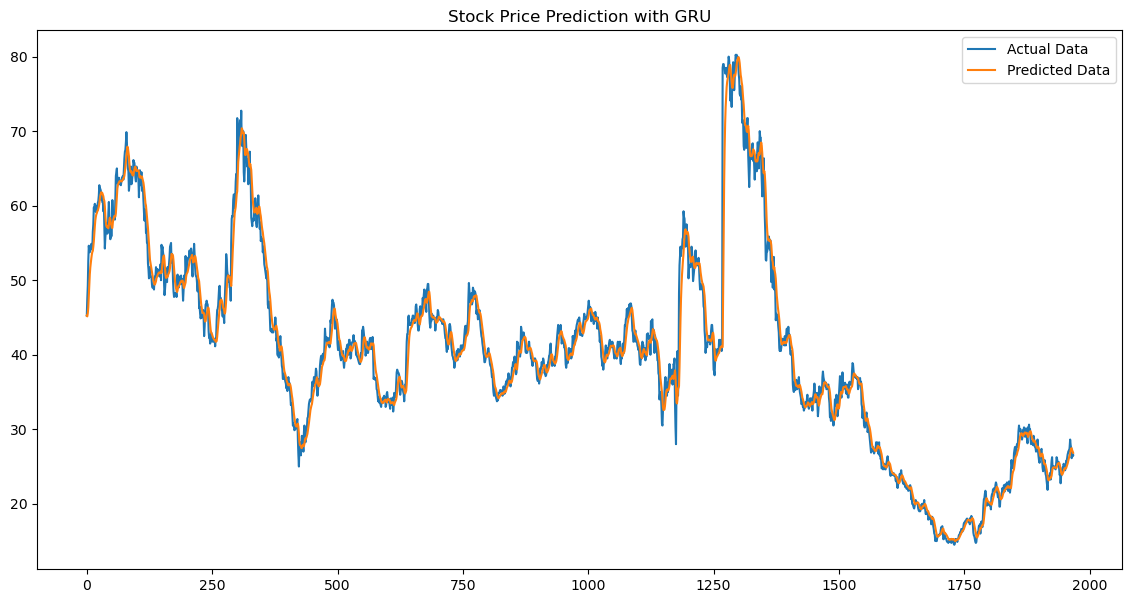

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Load the dataset
data = pd.read_csv('assignment.csv')

# Data preprocessing
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create sequences for the GRU model
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 120
x, y = create_sequences(scaled_close, sequence_length)

# Split the data into training and testing sets
train_size = int(len(y) * 0.67)
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

# Convert to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the GRU Model
class GRU(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, num_layers=1):
        super(GRU, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_layer_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, 1)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_layer_size).to(x.device)
        output, hidden = self.gru(x, h_0)
        output = self.linear(output[:, -1, :])
        return output

# Initialize the model, define the loss function and the optimizer
model = GRU()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss: {loss.item()}')

# Make predictions
model.eval()
predicted = model(x_test)
predicted = scaler.inverse_transform(predicted.detach().numpy())
actual = scaler.inverse_transform(y_test.detach().numpy())

# Plot the results
plt.figure(figsize=(14,7))
plt.plot(actual, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Stock Price Prediction with GRU')
plt.legend()
plt.show()

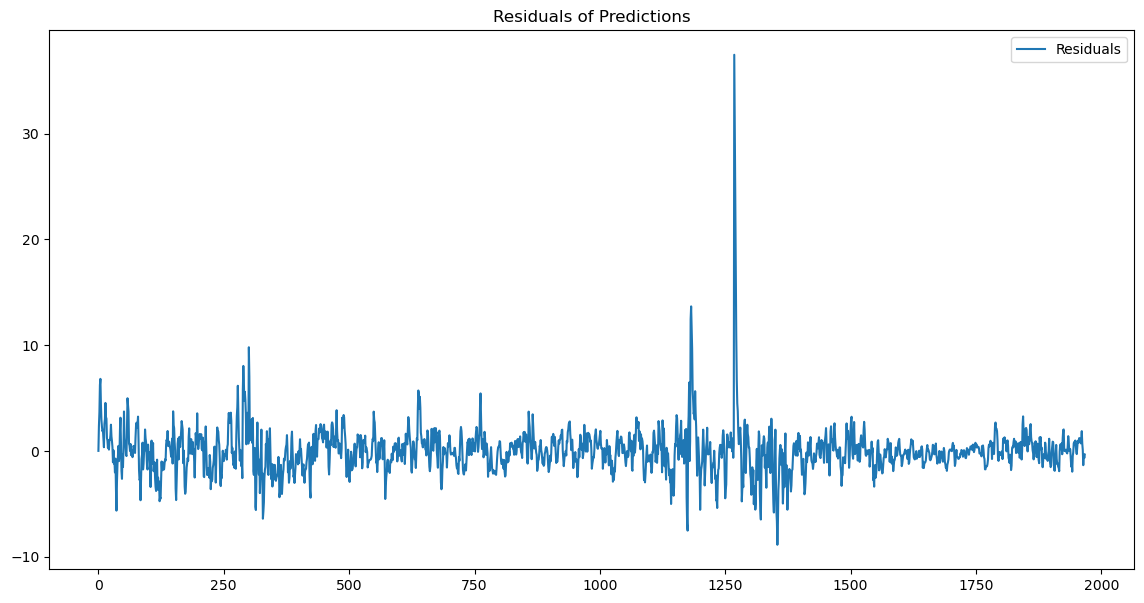

Mean Squared Error: 4.981208324432373


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset




residuals = actual - predicted

plt.figure(figsize=(14,7))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Predictions')
plt.legend()
plt.show()


mse = mean_squared_error(actual, predicted)
print(f'Mean Squared Error: {mse}')


In [7]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from torch.utils.data import DataLoader, TensorDataset

# Load the dataset
data = pd.read_csv('AAPL.csv')
close_prices = data['Close'].values.reshape(-1, 1)

# Data preprocessing
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_close = scaler.fit_transform(close_prices)

# Create sequences for the GRU model
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 120
x, y = create_sequences(scaled_close, sequence_length)

# Split the data into training and testing sets
train_size = int(len(y) * 0.67)
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the GRU Model
class GRU(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, num_layers=1):
        super(GRU, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_layer_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, 1)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_layer_size).to(x.device)
        output, hidden = self.gru(x, h_0)
        output = self.linear(output[:, -1, :])
        return output

# Initialize the model, define the loss function and the optimizer
model = GRU()

# Define hyperparameters for grid search
param_grid = {
    'hidden_layer_size': [50, 100],
    'num_layers': [1, 2],
    'learning_rate': [0.001, 0.01]
}

# Prepare data loaders
train_data = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Grid Search
best_loss = float('inf')
best_params = {}
grid = ParameterGrid(param_grid)

for params in grid:
    model = GRU(input_size=1, hidden_layer_size=params['hidden_layer_size'], num_layers=params['num_layers'])
    optimizer = torch.optim.Adam(model.parameters(), lr=params['learning_rate'])
    criterion = nn.MSELoss()
    
    # Train the model
    num_epochs = 10  # You may want to increase this number
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            output = model(x_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        predictions = model(x_test_tensor)
        loss = criterion(predictions, y_test_tensor)
        print(f"Params: {params}, Loss: {loss.item()}")
        
        # Save the model if it has a better loss
        if loss < best_loss:
            best_loss = loss
            best_params = params

# Output the best parameters
print(f"Best Parameters: {best_params}")



Params: {'hidden_layer_size': 50, 'learning_rate': 0.001, 'num_layers': 1}, Loss: 0.022879207506775856
Params: {'hidden_layer_size': 50, 'learning_rate': 0.001, 'num_layers': 2}, Loss: 0.023597441613674164
Params: {'hidden_layer_size': 50, 'learning_rate': 0.01, 'num_layers': 1}, Loss: 0.009534613229334354
Params: {'hidden_layer_size': 50, 'learning_rate': 0.01, 'num_layers': 2}, Loss: 0.01112738810479641
Params: {'hidden_layer_size': 100, 'learning_rate': 0.001, 'num_layers': 1}, Loss: 0.023151975125074387
Params: {'hidden_layer_size': 100, 'learning_rate': 0.001, 'num_layers': 2}, Loss: 0.024148987606167793
Params: {'hidden_layer_size': 100, 'learning_rate': 0.01, 'num_layers': 1}, Loss: 0.00966792181134224
Params: {'hidden_layer_size': 100, 'learning_rate': 0.01, 'num_layers': 2}, Loss: 0.034430671483278275
Best Parameters: {'hidden_layer_size': 50, 'learning_rate': 0.01, 'num_layers': 1}


Epoch 0 Loss: 0.7730823159217834
Epoch 10 Loss: 0.06913015246391296
Epoch 20 Loss: 0.013743099756538868
Epoch 30 Loss: 0.0018883172888308764
Epoch 40 Loss: 0.002634775824844837
Epoch 50 Loss: 0.0009259722428396344
Epoch 60 Loss: 0.0007418520981445909
Epoch 70 Loss: 0.0007023169891908765
Epoch 80 Loss: 0.000633294868748635
Epoch 90 Loss: 0.000592114229220897
Mean Squared Error: 2.58003830909729


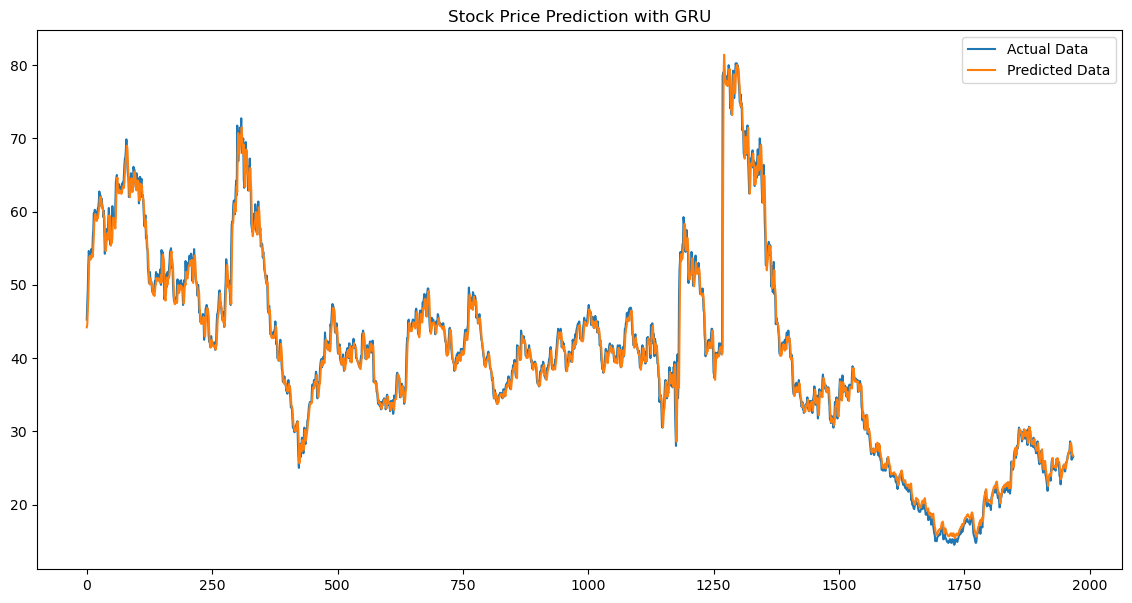

In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('assignment.csv')

# Data preprocessing
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_close = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create sequences for the GRU model
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 120
x, y = create_sequences(scaled_close, sequence_length)

# Split the data into training and testing sets
train_size = int(len(y) * 0.67)
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

# Convert to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the GRU Model
class GRU(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, num_layers=1):
        super(GRU, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_layer_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, 1)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_layer_size).to(x.device)
        output, hidden = self.gru(x, h_0)
        output = self.linear(output[:, -1, :])
        return output

# Initialize the model with the best parameters
model = GRU(hidden_layer_size=50, num_layers=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss: {loss.item()}')

# Make predictions
model.eval()
with torch.no_grad():
    predicted = model(x_test)
    predicted_np = scaler.inverse_transform(predicted.detach().numpy())
    actual_np = scaler.inverse_transform(y_test.detach().numpy())

# Calculate the mean squared error
mse = mean_squared_error(actual_np, predicted_np)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(14,7))
plt.plot(actual_np, label='Actual Data')
plt.plot(predicted_np, label='Predicted Data')
plt.title('Stock Price Prediction with GRU')
plt.legend()
plt.show()
